# Tennis points won

In the `tennis.csv` files of games played by Federer.

Does Federer score more total points than his opponent on average in a game?

In [2]:
import pandas as pd

df = pd.read_csv('data/tennis.csv')
is_fereder_avg_higher = df['player1 total points won'].mean() > df['player2 total points won'].mean()
print(f'It is {is_fereder_avg_higher} that Federer won more points then his opponents')   

It is True that Federer won more points then his opponents


# 2. College correlations

The `college.csv` filecontains a number of variables for 777 different universities and colleges in the US.

### 2.1

Use a scatterplot matrix to analyze the data and answer the following questions:

1. Which columns are possibly from a normal distribution? Statistically test if this is the case (you'll find a function for it in `scipy.stats`). For each explain if it is or not normally distributed.

2. Of the columns that aren't normally distributed, name which distribution could possibly fit them? (Use your research skills)

3. Give 3 pairs of columns that are highly correlated? Give their correlation coefficients.

4. Give 3 column pairs that are not correlated? Give their correlation coefficients.

#1 grad rate column is close to a normal distribution as per Shapiro Wilk test:
ShapiroResult(statistic=0.9947985410690308, pvalue=0.00941859744489193)
#2 Accet and Enroll look like Pareto Distributions as they show a 80/20 rule
#3 Accept and enroll are correlated with a cooeficcient of 0.911636663404009
#3 Top10perc and Top25perc undergrad are correlated with a cooeficcient of 0.8919949726786705
#3 Terminal and PhD undergrad are correlated with a cooeficcient of 0.8495870298679331
#4 F.Undergrad and P.Undergrad are not correlated with a cooeficcient of 0.5705121869790887
#4 Room.Board and Personal are not correlated with a cooeficcient of -0.1994281808513115
#4 Books and Enroll are not correlated with a cooeficcient of 0.1127108908015409


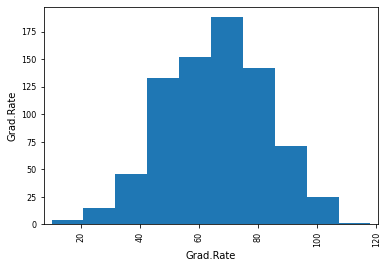

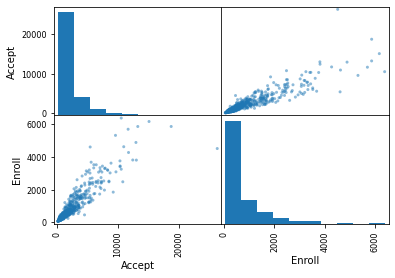

In [3]:
import matplotlib.pylab as plt
from scipy import stats
from scipy.stats import pearsonr

df = pd.read_csv('data/college.csv')

#1 
print('#1 grad rate column is close to a normal distribution as per Shapiro Wilk test:')
pd.plotting.scatter_matrix(df[['Grad.Rate']], alpha=0.2)
print(stats.shapiro(df['Grad.Rate']))

#2
print('#2 Accet and Enroll look like Pareto Distributions as they show a 80/20 rule')
pd.plotting.scatter_matrix(df[['Accept','Enroll', ]])

#3
coeff_1 = stats.pearsonr(df['Accept'], df['Enroll'])[0]
coeff_2 = stats.pearsonr(df['Top10perc'], df['Top25perc'])[0]
coeff_3 = stats.pearsonr(df['Terminal'], df['PhD'])[0]
print(f'#3 Accept and enroll are correlated with a cooeficcient of {coeff_1}')
print(f'#3 Top10perc and Top25perc undergrad are correlated with a cooeficcient of {coeff_2}')
print(f'#3 Terminal and PhD undergrad are correlated with a cooeficcient of {coeff_3}')

#4
coeff_4 = stats.pearsonr(df['F.Undergrad'], df['P.Undergrad'])[0]
coeff_5 = stats.pearsonr(df['Room.Board'], df['Personal'])[0]
coeff_6 = stats.pearsonr(df['Books'], df['Enroll'])[0]
print(f'#4 F.Undergrad and P.Undergrad are not correlated with a cooeficcient of {coeff_4}')
print(f'#4 Room.Board and Personal are not correlated with a cooeficcient of {coeff_5}')
print(f'#4 Books and Enroll are not correlated with a cooeficcient of {coeff_6}')


### 2.2 Boxplot

Make a boxplot of private vs outstate colleges. It should look like:

![](boxplort.png)

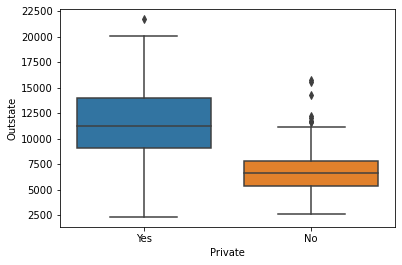

In [22]:
import seaborn as sns

sns.boxplot(data=df, x="Private", y="Outstate")

# 3. Auto data

The `auto.csv` data file is malformed.

Fix it (using only python) so that it can be read into pandas, and then give a scatterplot matrix of horsepower, weight, year and mpg.

Did cars get more efficient over time? Make an argument on this question.

mpg and weight seem to follow a opposite evolution indicating that cars are getting more efficient over time


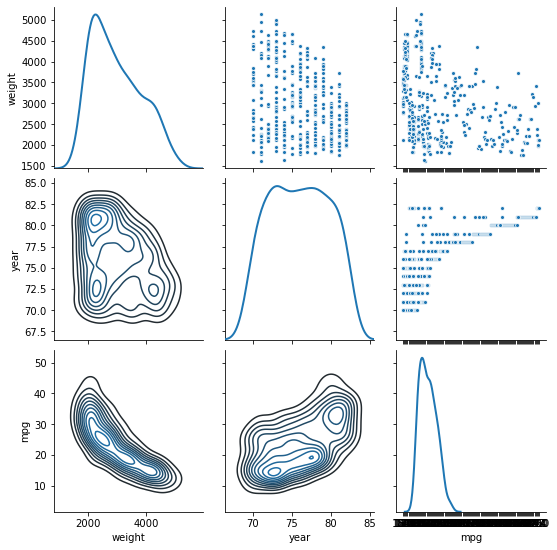

In [64]:
import matplotlib.pyplot as plt
df = pd.read_csv('data/auto.csv', delim_whitespace = True)
df = df.drop(df.index[[0]])

df = df[['horsepower', 'weight', 'year', 'mpg']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

print('mpg and weight seem to follow a opposite evolution indicating that cars are getting more efficient over time')

### 3.2 Auto Statistics

What is the mean, median and standard deviation of each quantitative feature?


In [67]:
df = pd.read_csv('data/auto.csv', delim_whitespace = True)
df[['cylinders', 'displacement', 'weight', 'acceleration']].describe()

,cylinders,displacement,weight,acceleration
count,397.000000,397.000000,397.000000,397.000000
mean,5.458438,193.532746,2970.261965,15.555668
std,1.701577,104.379583,847.904119,2.749995
min,3.000000,68.000000,1613.000000,8.000000
25%,4.000000,104.000000,2223.000000,13.800000
50%,4.000000,146.000000,2800.000000,15.500000
75%,8.000000,262.000000,3609.000000,17.100000
max,8.000000,455.000000,5140.000000,24.800000


### 3.3 data removal

Remove the 10th through 85th observations. 

Does the mean statistically significantly change for each of the columns?



In [70]:
df = df.drop(df.index[[i for i in range(10,85)]])
df[['cylinders', 'displacement', 'weight', 'acceleration']].describe()

print('dropping did not change signifcantly')

,cylinders,displacement,weight,acceleration
count,320.000000,320.000000,320.000000,320.000000
mean,5.362500,186.540625,2930.318750,15.731562
std,1.649499,99.372190,809.275266,2.680366
min,3.000000,68.000000,1649.000000,8.500000
25%,4.000000,99.500000,2213.750000,14.000000
50%,4.000000,144.500000,2792.500000,15.550000
75%,6.000000,250.000000,3474.750000,17.300000
max,8.000000,455.000000,4997.000000,24.800000


# 4. Boston housing dataset

You can use `from sklearn.datasets import load_boston` to load the boston housing dataset.

The `load_boston()['DESCR']` will describe columns for you.

Are any of the columns associated with per capita crime rate? If so, show the numeric relationship and give a possible explanation for highly correlated/negatively correlated features

In [81]:
from sklearn.datasets import load_boston

df = pd.DataFrame(data=load_boston()['data'], columns=load_boston()["feature_names"])

print('the crime rate seems correlated with TAX')
df.corr()


the crime rate seems correlated with TAX


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


### 4.2 Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios?




In [95]:
df.describe()

# taken from describe 75%
high_crime = 3.677083
high_tax = 666.000000
high_pupil_teach = 20.200000

# worst 25% of suburbs
print(df.loc[df.CRIM >= high_crime])

#worst 25% of Tax rates
print(df.loc[df.TAX >= high_tax])

#worst 25% of Pupil-teacher ratios
print(df.loc[df.PTRATIO >= high_pupil_teach])

        CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
143  4.09740  0.0  19.58   0.0  0.871  5.468  100.0  1.4118   5.0  403.0   
356  8.98296  0.0  18.10   1.0  0.770  6.212   97.4  2.1222  24.0  666.0   
357  3.84970  0.0  18.10   1.0  0.770  6.395   91.0  2.5052  24.0  666.0   
358  5.20177  0.0  18.10   1.0  0.770  6.127   83.4  2.7227  24.0  666.0   
359  4.26131  0.0  18.10   0.0  0.770  6.112   81.3  2.5091  24.0  666.0   
..       ...  ...    ...   ...    ...    ...    ...     ...   ...    ...   
480  5.82401  0.0  18.10   0.0  0.532  6.242   64.7  3.4242  24.0  666.0   
481  5.70818  0.0  18.10   0.0  0.532  6.750   74.9  3.3317  24.0  666.0   
482  5.73116  0.0  18.10   0.0  0.532  7.061   77.0  3.4106  24.0  666.0   
486  5.69175  0.0  18.10   0.0  0.583  6.114   79.8  3.5459  24.0  666.0   
487  4.83567  0.0  18.10   0.0  0.583  5.905   53.2  3.1523  24.0  666.0   

     PTRATIO       B  LSTAT  
143     14.7  396.90  26.42  
356     20.2  377.73  17.60

### 4.3 How many of the suburbs in this data set bound the Charles river?

In [97]:
charles_river_len = len(df.loc[df.CHAS > 0])

print(f'{charles_river_len} suburbs xset bound to the Charles river')

35 set bound to the Charles river


### 4.4 What is the median pupil-teacher ratio among the towns in this data set?

In [98]:
df['PTRATIO'].median()

19.05

### 4.5 Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.



In [100]:
df['MEDV'] = load_boston()['target']
df['MEDV'].idxmin()


398

### 4.6 In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.




In [103]:
print(f'There are {len(df.loc[df.RM > 7])} Suburbs with more than 7 rooms')
print(f'There are {len(df.loc[df.RM > 8])} Suburbs with more than 9 rooms')


There are 64 Suburbs with more than 7 rooms
There are 13 Suburbs with more than 7 rooms
